# INTRODUCTION
The Superstore dataset is a rich and comprehensive dataset containing information on the sales, 
orders, and customers of a fictional superstore. The dataset which was collected from kaggle provides a detailed view of the 
business operations of the superstore, including information on the products sold, the customers 
who purchase them, and the sales performance across different regions and categories with about 9,994 rows of data
spanning four years (2014-2017),With growing demands and cut-throat competitions in the market, a Superstore Giant is seeking your knowledge in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.
In this report, I perform python-based exploratory data analysis to gain insights about the 
fictional superstore.
#Step 1. Imports
#Import packages
#Load dataset


In [3]:
#Import packages

# For data manipulation
import pandas as pd
import numpy as np

# For data visualization

import seaborn as sn
import matplotlib.pyplot as plt
     


In [4]:
# Load dataset into dataframe

superstore = pd.read_csv("superStore.csv")

# Display first few rows of the dataframe
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
#Step 2. Data Exploration (Initial EDA and data cleaning)
#Gather basic information about the data

# number of rows and column
superstore.shape

# Gather basic information about the data

superstore.info()
     


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
#Check missing values
#Check for any missing values in the data.

# Checking for missing values
superstore.isna().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
#There are no missing values in the data
#Rename columns
#As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in snake_case, correct any column names that are misspelled, and make column names more concise as needed.

# Display all columns

superstore.columns
     

# Rename columns as needed

superstore= superstore.rename(columns={"Row ID": "Row_id", "Order ID":"Order_id", "Order Date":"Order_date", 
                                       "Ship Date":"Ship_date", "Ship Mode":"Ship_mode", "Customer ID":"customer_id", 
                                       "Customer Name":"Customer_name", "Postal Code":"Postal_code","Product ID":"Product_id", 
                                       "Sub-Category":"Sub_category", "Product Name":"Product_name" })
     


In [8]:
# Display all column names after the update

superstore.columns
     


Index(['Row_id', 'Order_id', 'Order_date', 'Ship_date', 'Ship_mode',
       'customer_id', 'Customer_name', 'Segment', 'Country', 'City', 'State',
       'Postal_code', 'Region', 'Product_id', 'Category', 'Sub_category',
       'Product_name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
#Check duplicates


# checking for duplicate rows
superstore.duplicated().sum()
     

#There are no duplicate rows
#Gather descriptive statistics about the data


# Use descriptive statistics to understand the distribution of numerical columns
superstore.describe().style.background_gradient(cmap ="Greens")


,Row_id,Postal_code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
#Analyze Stage
#Perform EDA (analyze relationships between variables)
#Step 2. Data Exploration (Continue EDA)
#Data visualizations
#Question One
#What is the total sales and profit of the superstore?


# Calculate total sales and profit
total_sales = superstore['Sales'].sum()
total_profit = superstore['Profit'].sum()

# Print the results
print('Total sales: ${:,.2f}'.format(total_sales))
print('Total profit: ${:,.2f}'.format(total_profit))


Total sales: $2,297,200.86
Total profit: $286,397.02


In [11]:
#Question Two
#What is the total sales and profit by category?


# Group by category and calculate total sales and profit
category_ts_p = superstore.groupby('Category')[['Sales', 'Profit']].sum()
print(category_ts_p)


                       Sales       Profit
Category                                 
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008
Technology       836154.0330  145454.9481


(0.0, 1000000.0)

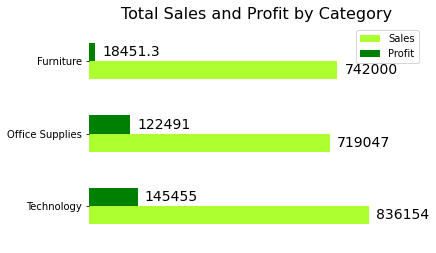

In [84]:
# Plot the results using a bar chart
colors= ['#ADFF2F', '#008000']
plt1= category_ts_p.iloc[::-1].plot(kind='barh', color=colors)
plt1.set_title('Total Sales and Profit by Category', fontsize=16)
for i in plt1.containers:
    plt1.bar_label(i, label_type='edge', fontsize=14, padding=7)
plt1.set_xticks([], [])
plt1.set_ylabel('')
plt1.set_xlim(0, 1000000)
#plt1.patches[4].set_facecolor('#8B8B83')


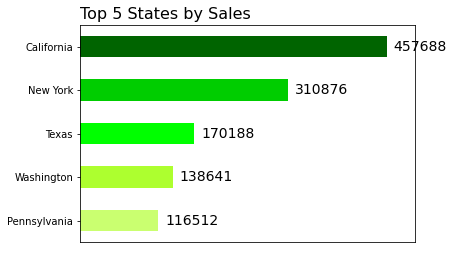

In [12]:
#Question Three
#Show the top 5 states that made the highest sales


# Group the top 5 states and calculate the total sales

sales_state = superstore.groupby('State')['Sales'].sum().sort_values(ascending=False).head()
sales_state
colorS = ['#CAFF70','#ADFF2F','#00FF00', '#00CD00','#006400']
plt3 = sales_state.iloc[::-1].plot(kind='barh', color=colorS, legend=False)
plt3.set_title('Top 5 States by Sales', fontsize = 16, loc='left')
for i in plt3.containers:
    plt3.bar_label(i, label_type='edge', fontsize=14, padding=7)
plt3.set_xticks([], [])
plt3.set_ylabel('')
plt3.set_xlim(0, 500000)
plt3.patches[4].set_facecolor=('purple')



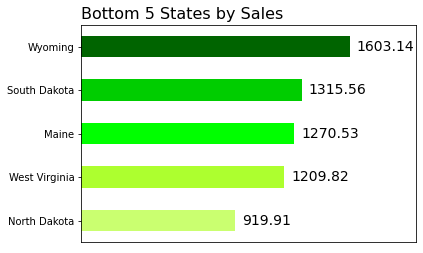

In [13]:
#Question Four
#Show the bottom 5 states that made the highest sales


# Group the bottom 5 states and calculate the total sales

sales_bottom_state = superstore.groupby('State')['Sales'].sum().sort_values(ascending=False).tail()
sales_bottom_state
    


color = ['#CAFF70','#ADFF2F','#00FF00', '#00CD00','#006400']
plt4 = sales_bottom_state.iloc[::-1].plot(kind='barh', color=color, legend=False)
plt4.set_title('Bottom 5 States by Sales', fontsize = 16, color="black", loc='left')
for i in plt4.containers:
    plt4.bar_label(i, label_type='edge', fontsize=14, padding=7)
plt4.set_xticks([], [])
plt4.set_ylabel('')
plt4.set_xlim(0, 2000)
plt4.patches[4].set_facecolor=('purple')
     


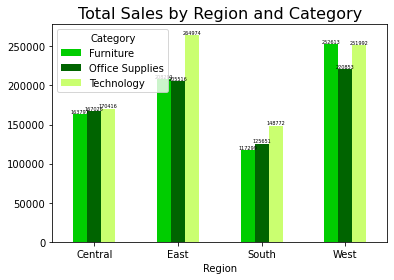

In [14]:
#Question Five
#What is the total sales by region and category?


# Creating a pivot table to identify total sales by region and category 

totalsales_region_category = superstore.pivot_table(values='Sales', index='Region', columns='Category', aggfunc=np.sum)

totalsales_region_category
colors = ['#00CD00','#006400','#CAFF70']
plt1 = totalsales_region_category.plot(kind='bar', color=colors)
plt1.set_title('Total Sales by Region and Category', fontsize=16, color= "black")
for i in plt1.containers:
  plt1.bar_label(i, label_type='edge', fontsize=5)
plt1.set_xlabel=('')
plt1.set_ylabel=('')
plt1.tick_params(axis='x', rotation=0)

     


In [40]:
#Question Six
#What is the most popular ship mode class?


# Get the value count of ship mode and convert to percentage

counts= superstore['Ship_mode'].value_counts(normalize=True)*100
percent = counts.round(1).astype(str).add('%')
percent
     


Standard Class    59.7%
Second Class      19.5%
First Class       15.4%
Same Day           5.4%
Name: Ship_mode, dtype: object

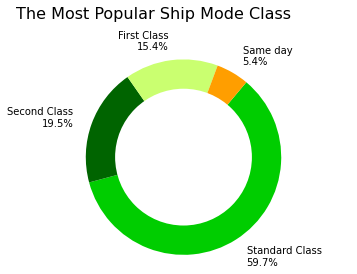

In [99]:
# Plot a donut chart
# set fig and axes

fig, ax = plt.subplots()
colors = ['#00CD00','#006400','#CAFF70', '#FF9E00']
labels= ['Standard Class\n59.7%', 'Second Class\n19.5%', 'First Class\n15.4%', 'Same day\n5.4%']
ax.pie(counts, colors=colors, labels=labels, startangle=50, counterclock=False, pctdistance=0.8, labeldistance=1.2)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)
ax.set_title('The Most Popular Ship Mode Class', fontsize = 16, loc='left', pad=30)
ax.axis('equal')
plt.show()
     


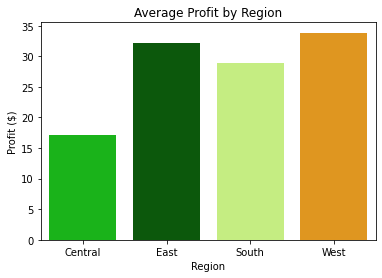

In [15]:
#Question Seven
#Calculate the average profit by region
#Using the groupby function to calculate average profit by region


# Groupby to calculate average profit by region

average_profit_region= superstore.groupby(['Region'])['Profit'].mean()
average_profit_region
colors = ['#00CD00','#006400','#CAFF70', '#FF9E00']
sn.barplot(x=average_profit_region.index, y=average_profit_region.values, palette=colors)
plt.title('Average Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit ($)')
plt.show()
     



In [60]:
# Create a new column that contains the total revenue

superstore['Revenue'] = superstore['Sales'] - superstore['Discount']
Total_revenue = superstore['Revenue'].sum()
Total_revenue


2295639.7703

In [47]:
#Assign KPI's


# Assign KPI's

superstore = superstore.assign(col=['KPI']*9994, inplace=True)

# Create a new column that contains revenue

superstore['Revenue'] = superstore['Sales'] - superstore['Discount']
superstore['Revenue'].sum()


2295639.7703

In [69]:
# create pivot tables
pivot1 = pd.pivot_table(superstore, values='Sales', index=None, columns='col', aggfunc=sum)
pivot2 = pd.pivot_table(superstore, values='State', index=None, columns='col', aggfunc=pd.Series.nunique)
pivot3 = pd.pivot_table(superstore, values='Profit', index=None, columns='col', aggfunc=sum)
pivot4 = pd.pivot_table(superstore, values='Discount', index=None, columns='col', aggfunc=sum)
pivot5 = pd.pivot_table(superstore, values='Revenue', index=None, columns='col', aggfunc=sum)

pivot2


col,KPI
State,49


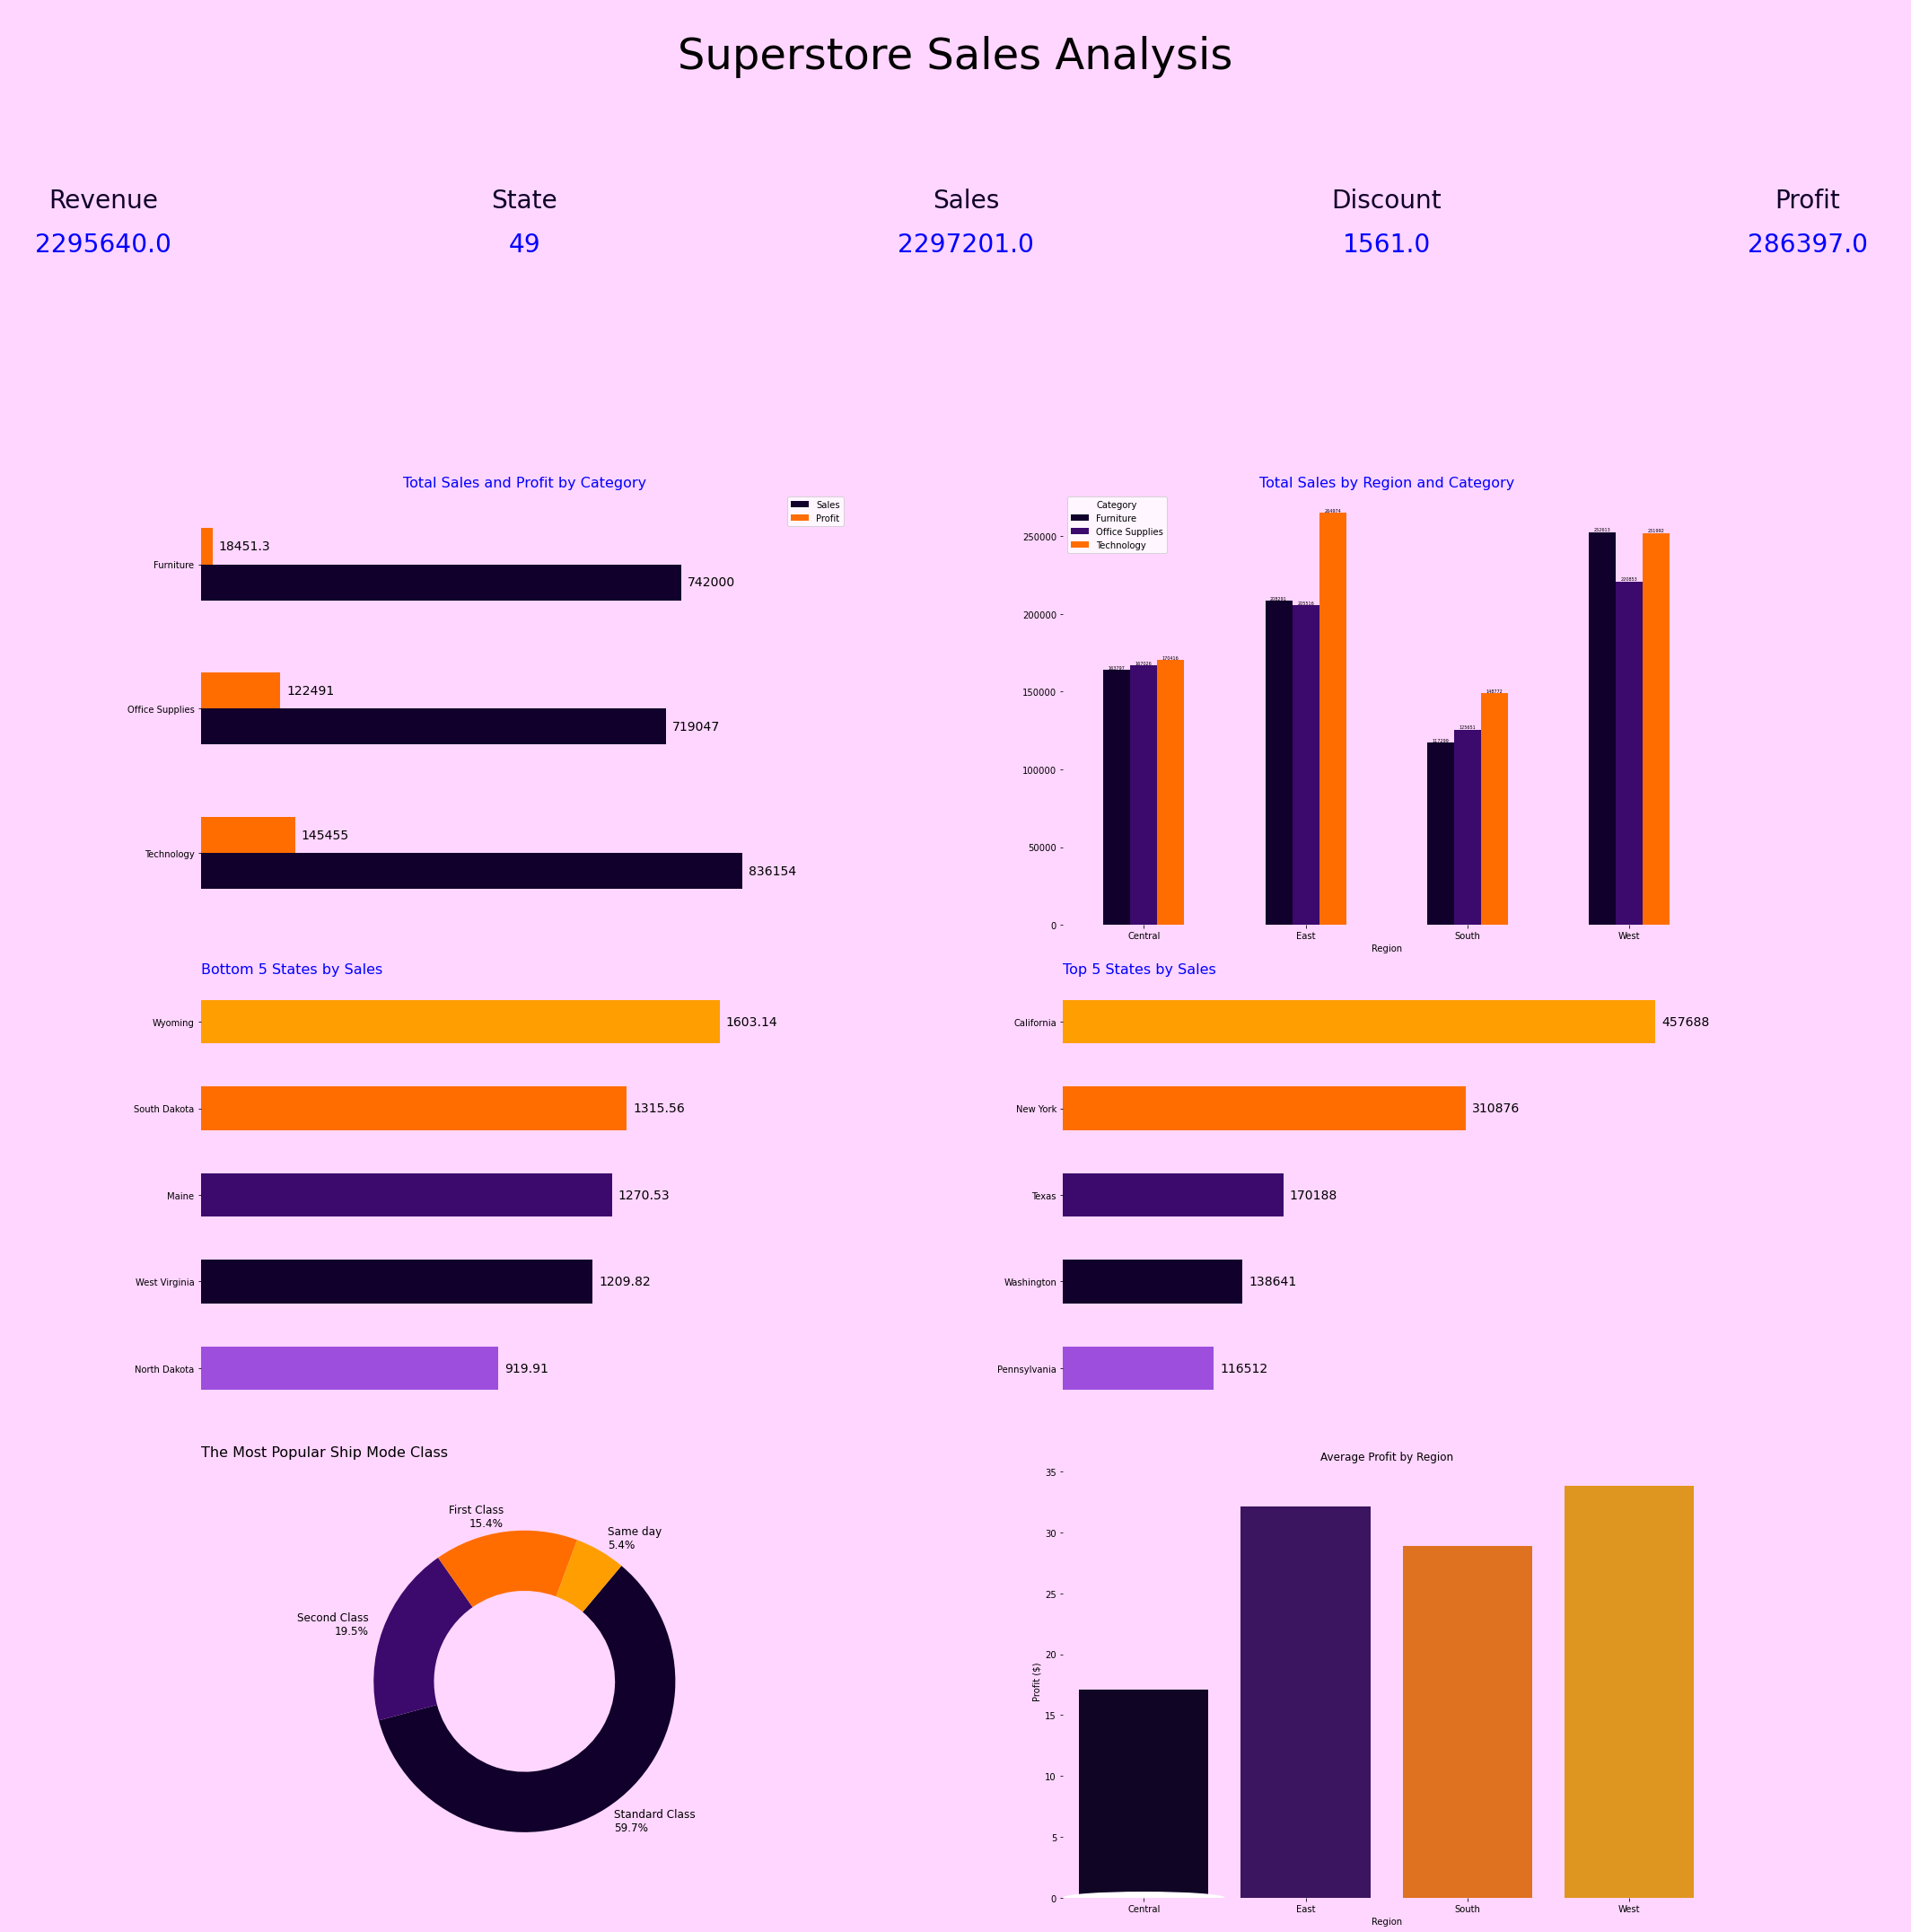

In [54]:
#Step 3. Dashboard Visualization
#Create dashboard using matplotlib and seaborn


from matplotlib.patches import Wedge
fig, axs = plt.subplots(4, 2, figsize=(30, 30), facecolor='#FFD6FF')

# set the dashboard default edge color 
plt.rcParams['axes.edgecolor'] = 'none'

# set the dashboard default color cycle 
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#FFD6FF'])

#avearage profit by region
colors = ['#10002B', '#3C096C', '#FF6D00', '#FF9E00']
sn.barplot(x=average_profit_region.index, y=average_profit_region.values, palette=colors )
plt.title('Average Profit by Region')
plt.xlabel('Region')
plt.ylabel('Profit ($)')

# ship mode class
colors = ['#10002B', '#3C096C', '#FF6D00', '#FF9E00']
labels= ['Standard Class\n59.7%', 'Second Class\n19.5%', 'First Class\n15.4%', 'Same day\n5.4%']
axs[3,0].pie(counts, colors=colors, labels=labels, startangle=50, counterclock=False, pctdistance=0.85, wedgeprops={'width':0.4})
axs[3,0].axis('equal')
circle = plt.Circle(xy=(0,0), radius=0.5, facecolor='white')
plt.gca().add_artist(circle)
axs[3,0].set_title('The Most Popular Ship Mode Class', fontsize = 16, loc='left', pad=10)
# adjust the size of the doughnut chart
axs[3, 0].set_xlim(-1, 1)
axs[3, 0].set_ylim(-1, 1)
axs[3, 0].set_autoscale_on(False)
# increase the font size of the labels
for text in axs[3, 0].texts:
    text.set_fontsize(12)

# total sales by region and category
colors = ['#10002B', '#3C096C', '#FF6D00']
plt1 = totalsales_region_category.plot(kind='bar', color=colors, ax=axs[1,1])
plt1.set_title('Total Sales by Region and Category', fontsize=16, color= "blue")
for i in plt1.containers:
  plt1.bar_label(i, label_type='edge', fontsize=5)
plt1.set_xlabel=('')
plt1.set_ylabel=('')
plt1.tick_params(axis='x', rotation=0)

#top 5 states by sales
color = ['#9D4EDD', '#10002B', '#3C096C', '#FF6D00', '#FF9E00']
plt3 = sales_state.iloc[::-1].plot(kind='barh', color=color, legend=False, ax=axs[2, 1])
plt3.set_title('Top 5 States by Sales', fontsize = 16, color= "blue", loc='left')
for i in plt3.containers:
    plt3.bar_label(i, label_type='edge', fontsize=14, padding=7)
plt3.set_xticks([], [])
plt3.set_ylabel('')
plt3.set_xlim(0, 500000)
plt3.patches[4].set_facecolor=('purple')

# bottom 5 states by sales
color = ['#9D4EDD', '#10002B', '#3C096C', '#FF6D00', '#FF9E00']
plt4 = sales_bottom_state.iloc[::-1].plot(kind='barh', color=color, legend=False, ax=axs[2,0])
plt4.set_title('Bottom 5 States by Sales', fontsize = 16, color="blue", loc='left')
for i in plt4.containers:
    plt4.bar_label(i, label_type='edge', fontsize=14, padding=7)
plt4.set_xticks([], [])
plt4.set_ylabel('')
plt4.set_xlim(0, 2000)
plt4.patches[4].set_facecolor=('purple')

# total sales and profit by category
colors= ['#10002B', '#FF6D00']
plt1= category_ts_p.iloc[::-1].plot(kind='barh', color=colors, ax=axs[1, 0])
plt1.set_title('Total Sales and Profit by Category', fontsize=16, color="blue")
for i in plt1.containers:
    plt1.bar_label(i, label_type='edge', fontsize=14, padding=7)
plt1.set_xticks([], [])
plt1.set_ylabel('')
plt1.set_xlim(0, 1000000)
plt1.patches[4].set_facecolor('#FF6D00')

# key performance indicator
kpis = [axs[0, 1].table(cellText=pivot1.values.round(), colLabels=['Sales'], loc='left', cellLoc='center'),
        axs[0, 0].table(cellText=pivot2.values.round(),colLabels=['State'], loc='center', cellLoc='center'),
        axs[0, 1].table(cellText=pivot3.values.round(), colLabels=['Profit'], loc='right', cellLoc='center'),
        axs[0, 1].table(cellText=pivot4.values.round(),colLabels=['Discount'], loc='center', cellLoc='center'),
        axs[0, 0].table(cellText=pivot5.values.round(), colLabels=['Revenue'], loc='left', cellLoc='center'),
        ]
for kpi in kpis:
    kpi.set_fontsize(28)
    kpi.scale(0.3, 3)
    for cell in kpi._cells:
        kpi._cells[cell].set_linewidth(0)
        kpi._cells[cell].set_color('none')
        if cell == (0, 0):
            kpi._cells[cell].set_text_props(color='#10002B')
        elif cell[0] == 1:
            kpi._cells[cell].set_text_props(weight='normal', color='blue', fontsize=30)
for ax in axs.flatten():
    ax.set_facecolor('None')
axs[0, 1].axis('off')
axs[0, 0].axis('off')

# Adjust spacing between subplots
fig.tight_layout()

#Add overall title to the Dashboard
fig.suptitle('Superstore Sales Analysis', fontsize=48)

#Display the Dashboard
plt.show()


